# Speech_Commands:-Dataset_for_Limited-Vocabulary_Speech-Recognition

#import_libraries

In [2]:
import tensorflow as tf
!pip install tensorflow_datasets
import tensorflow_datasets as tfds

  Preparing metadata (setup.py) ... done
  Using cached protobuf-4.25.4-cp37-abi3-macosx_10_9_universal2.whl.metadata (541 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 3.4 MB/s eta 0:00:00a 0:00:01
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21486 sha256=1f00c23a09da77aa9d8ec7bc5a028c1b3a0416fa4033b4ecc542f9a53aaa4a29
  Stored in directory: /Users/vimlendusharma/Library/Caches/pip/wheels/90/74/b1/9b54c896b8d9409e9268329d4d45ede8a8040abe91c8879932
Successfully built promise
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.23.4
    Uninstalling protobuf-4.23.4:
      Successfully uninstalled protobuf-4.23.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.15.1 requires protobuf<4.24,>=3.19.6, but you have protobuf 4.25.4 which is incompatible.
grpcio-tools 1.65.2 requires protob

#Download_the_Dataset_of_Speech_Command

In [5]:
#load_speech-command_dataset_version-0.01
ds, ds_info = tfds.load('speech_commands', split='train', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/85511 [00:00<?, ? examples/s]

Shuffling /Users/vimlendusharma/tensorflow_datasets/speech_commands/incomplete.66GJ7F_0.0.3/speech_commands-tr…

Generating validation examples...:   0%|          | 0/10102 [00:00<?, ? examples/s]

Shuffling /Users/vimlendusharma/tensorflow_datasets/speech_commands/incomplete.66GJ7F_0.0.3/speech_commands-va…

Generating test examples...:   0%|          | 0/4890 [00:00<?, ? examples/s]

Shuffling /Users/vimlendusharma/tensorflow_datasets/speech_commands/incomplete.66GJ7F_0.0.3/speech_commands-te…

Dataset speech_commands downloaded and prepared to /Users/vimlendusharma/tensorflow_datasets/speech_commands/0.0.3. Subsequent calls will reuse this data.


In [6]:
#Display_basic_info._about_dataset
print(ds_info)

tfds.core.DatasetInfo(
    name='speech_commands',
    full_name='speech_commands/0.0.3',
    description="""
    An audio dataset of spoken words designed to help train and evaluate keyword
    spotting systems. Its primary goal is to provide a way to build and test small
    models that detect when a single word is spoken, from a set of ten target words,
    with as few false positives as possible from background noise or unrelated
    speech. Note that in the train and validation set, the label "unknown" is much
    more prevalent than the labels of the target words or background noise. One
    difference from the release version is the handling of silent segments. While in
    the test set the silence segments are regular 1 second files, in the training
    they are provided as long segments under "background_noise" folder. Here we
    split these background noise into 1 second clips, and also keep one of the files
    for the validation set.
    """,
    homepage='https://arxiv.or

#Print_sample_audio_clip_and_its_label

In [7]:
for audio, label in ds.take(1):
    print(f'Label:{label.numpy()}')
    print(f'Audio tensor:{audio.numpy()}')
    

Label:4
Audio tensor:[-15 -18 -12 ...  16  21  25]


#Split_dataset_into_train_validation_and_test_sets

In [12]:
train_ratio=0.8
val_ratio=0.1
test_ratio=0.1

ds=ds.shuffle(buffer_size=10000)

total_size=sum(1 for _ in ds)
train_size=int(train_ratio*total_size)
val_size=int(val_ratio*total_size)

In [13]:
train_ds = ds.take(train_size)
remaining_ds = ds.skip(train_size)
val_ds = remaining_ds.take(val_size)
test_ds = remaining_ds.skip(val_size)

In [14]:
batch_size = 32
train_ds = train_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [15]:
print(f"Training set size: {train_size}")
print(f"Validation set size: {val_size}")
print(f"Test set size: {total_size - train_size - val_size}")

Training set size: 68408
Validation set size: 8551
Test set size: 8552


#Store_Data_for_further_Analysis

In [16]:
def preprocess_and_save(dataset, split_name):
    for i, (audio, label) in enumerate(dataset):
        #save_audio_&label_to_disk_for_analysis
        tf.audio.encode_wav(audio.numpy(), 'audio_{}.wav'.format(i))
        with open('label_{}.txt'.format(i), 'w') as f:
            f.write(str(label.numpy())) #save_label

In [20]:
import tensorflow as tf
import numpy as np
import soundfile as sf 

def preprocess_and_save(dataset, split_name, sample_rate=16000):
    for i, (audio, label) in enumerate(dataset):
        #Convert_tensors_to_numpy_arrays
        audio_np = audio.numpy()
        label_np = str(label.numpy()) #Convert_label_to_string_directly

        #_Save_audio_data_to_a_WAV_file
        if audio_np.ndim == 1:
            audio_np = np.expand_dims(audio_np, axis=0)  #_Add_channel-dimension_if_necessary
        file_name = f'audio_{i}.wav'
        sf.write(file_name, audio_np.T, sample_rate) 

        # Save_label_to_a_text_file
        label_file_name = f'label_{i}.txt'
        with open(label_file_name, 'w') as f:
            f.write(label_np)

        if i % 100 == 0:
            print(f'Saved {i} files.')

# Example usage
preprocess_and_save(ds, 'train')


Saved 0 files.
Saved 100 files.
Saved 200 files.
Saved 300 files.
Saved 400 files.
Saved 500 files.
Saved 600 files.
Saved 700 files.
Saved 800 files.
Saved 900 files.
Saved 1000 files.
Saved 1100 files.
Saved 1200 files.
Saved 1300 files.
Saved 1400 files.
Saved 1500 files.
Saved 1600 files.
Saved 1700 files.
Saved 1800 files.
Saved 1900 files.
Saved 2000 files.
Saved 2100 files.
Saved 2200 files.
Saved 2300 files.
Saved 2400 files.
Saved 2500 files.
Saved 2600 files.
Saved 2700 files.
Saved 2800 files.
Saved 2900 files.
Saved 3000 files.
Saved 3100 files.
Saved 3200 files.
Saved 3300 files.
Saved 3400 files.
Saved 3500 files.
Saved 3600 files.
Saved 3700 files.
Saved 3800 files.
Saved 3900 files.
Saved 4000 files.
Saved 4100 files.
Saved 4200 files.
Saved 4300 files.
Saved 4400 files.
Saved 4500 files.
Saved 4600 files.
Saved 4700 files.
Saved 4800 files.
Saved 4900 files.
Saved 5000 files.
Saved 5100 files.
Saved 5200 files.
Saved 5300 files.
Saved 5400 files.
Saved 5500 files.
Save

In [21]:
preprocess_and_save(ds, 'test')

Saved 0 files.
Saved 100 files.
Saved 200 files.
Saved 300 files.
Saved 400 files.
Saved 500 files.
Saved 600 files.
Saved 700 files.
Saved 800 files.
Saved 900 files.
Saved 1000 files.
Saved 1100 files.
Saved 1200 files.
Saved 1300 files.
Saved 1400 files.
Saved 1500 files.
Saved 1600 files.
Saved 1700 files.
Saved 1800 files.
Saved 1900 files.
Saved 2000 files.
Saved 2100 files.
Saved 2200 files.
Saved 2300 files.
Saved 2400 files.
Saved 2500 files.
Saved 2600 files.
Saved 2700 files.
Saved 2800 files.
Saved 2900 files.
Saved 3000 files.
Saved 3100 files.
Saved 3200 files.
Saved 3300 files.
Saved 3400 files.
Saved 3500 files.
Saved 3600 files.
Saved 3700 files.
Saved 3800 files.
Saved 3900 files.
Saved 4000 files.
Saved 4100 files.
Saved 4200 files.
Saved 4300 files.
Saved 4400 files.
Saved 4500 files.
Saved 4600 files.
Saved 4700 files.
Saved 4800 files.
Saved 4900 files.
Saved 5000 files.
Saved 5100 files.
Saved 5200 files.
Saved 5300 files.
Saved 5400 files.
Saved 5500 files.
Save

In [37]:
# Split_the_dataset_correctly
ds = tfds.load('speech_commands', split=['train', 'test', 'validation'], as_supervised=True)

# Access each split
train_ds = ds[0]
test_ds = ds[1]
val_ds = ds[2]


In [38]:
def get_dataset_info(dataset, dataset_info):
    print(f"Dataset Name: {dataset_info.name}")
    print(f"Total Number of Examples: {dataset_info.splits['train'].num_examples}")
    print(f"Number of Classes: {dataset_info.features['label'].num_classes}")
    print(f"Classes: {dataset_info.features['label'].names}")

In [39]:
get_dataset_info(train_ds, ds_info)

Dataset Name: speech_commands
Total Number of Examples: 85511
Number of Classes: 12
Classes: ['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes', '_silence_', '_unknown_']


In [40]:
# Count_number_of_examples_in_each_split
train_size = tf.data.experimental.cardinality(train_ds).numpy()
test_size = tf.data.experimental.cardinality(test_ds).numpy()
val_size = tf.data.experimental.cardinality(val_ds).numpy()

In [41]:
print(f"Training examples: {train_size}")
print(f"Testing examples: {test_size}")
print(f"Validation examples: {val_size}")


Training examples: 85511
Testing examples: 4890
Validation examples: 10102


# Data_Pre-processing

In [45]:
def preprocess(audio, label):
    audio = tf.cast(audio, tf.float32) / 255.0 
    desired_length = 16000  
    audio = tf.cond(tf.shape(audio)[0] < desired_length, 
                    lambda: tf.pad(audio, [[0, desired_length - tf.shape(audio)[0]]]), 
                    lambda: audio[:desired_length]) 
    
    return audio, label


train_ds = train_ds.map(preprocess)
test_ds = test_ds.map(preprocess)
val_ds = val_ds.map(preprocess)

In [46]:
train_ds = train_ds.batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.batch(32).prefetch(tf.data.AUTOTUNE)

#Data_Analysis(Class_distribution)

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def plot_class_ditrsibution(dataset, dataset_info):
    labels = [label.numpy() for _, label in dataset]
    labels = np.concatenate(labels)
    label_counts = Counter(labels)
    class_names = dataset_info.features['label'].names
    classes, counts = zip(*label_counts.items())
    
    plt.figure(figsize=(10, 6))
    plt.bar(classes, counts)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Class Distribution')
    plt.xticks(ticks=np.arange(len(classes)), labels=[class_names[i] for i in classes], rotation=45)
    plt.show()

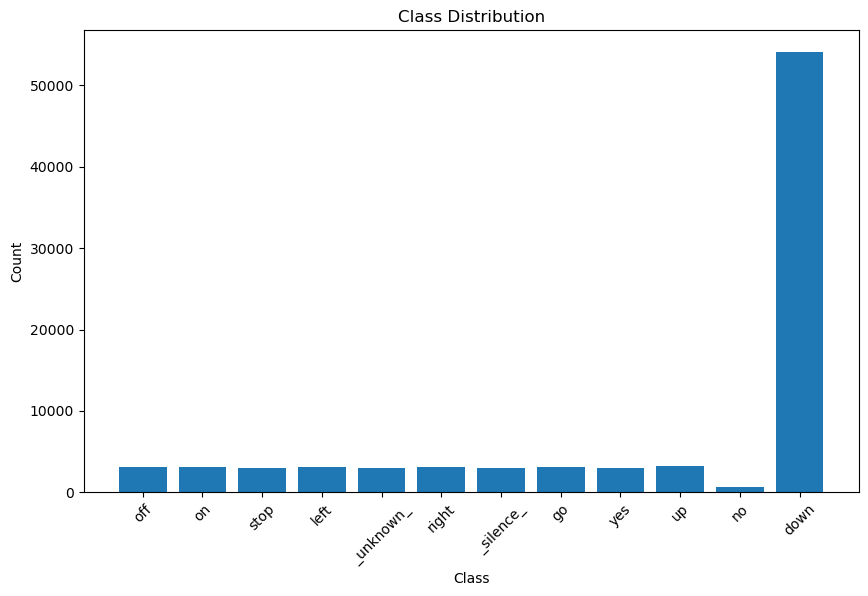

In [50]:
plot_class_ditrsibution(train_ds, ds_info)

# Visualise_Audio_waveform

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

def plot_waveform(dataset, ds_info, num_samples=5):
    plt.figure(figsize=(12, 8))
    
    #_Flatten_the_dataset_into_a_list_of-(audio, label)-pairs
    audio_list = []
    label_list = []
    
    for audio, labels in dataset.take(num_samples):
        audio_list.extend(audio.numpy())
        label_list.extend(labels.numpy())

    total_plots = len(audio_list)
    num_rows = (total_plots + 4) // 5  #Adjust-number_of_rows-dynamically

    for idx, (audio, label) in enumerate(zip(audio_list, label_list)):
        plt.subplot(num_rows, 5, idx + 1)
        
        # Get_the_class_name_using-the-label
        if hasattr(ds_info, 'features') and 'label' in ds_info.features:
            label_name = ds_info.features['label'].names[label]
        else:
            label_name = str(label)  #-Fallback-if_ds_info_does_not_have_label_information

        plt.plot(audio)
        plt.title(f'Label: {label_name}')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')

    plt.tight_layout()
    plt.show()


/var/folders/cj/0w5hsz6d7hsgpdmwp3dwlw2w0000gn/T/ipykernel_13303/1074978506.py:33: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


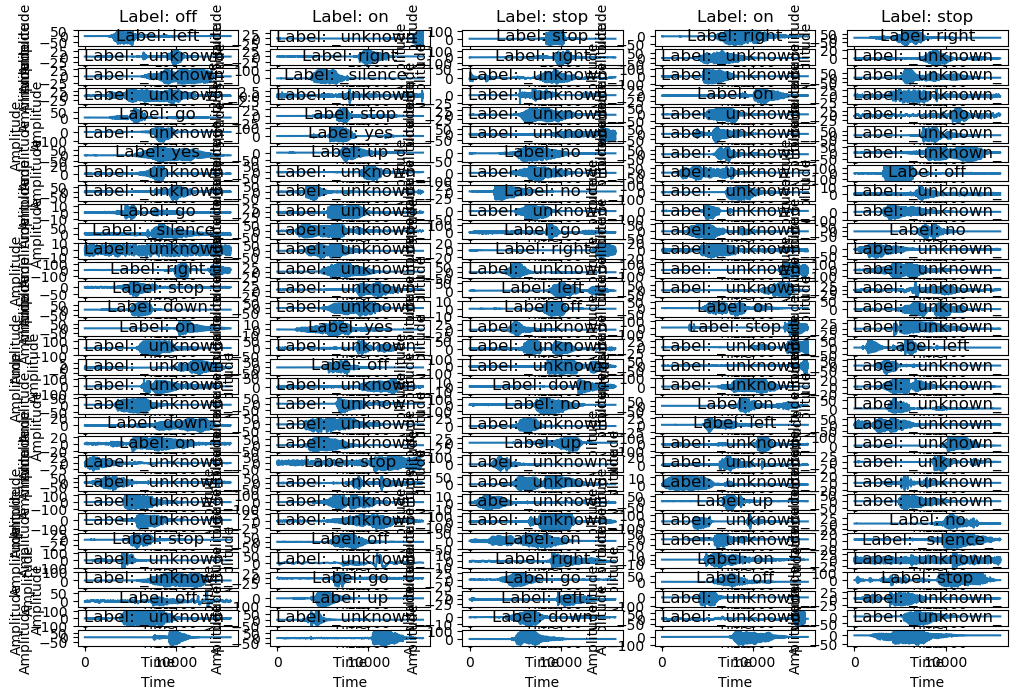

In [84]:
plot_waveform(train_ds, ds_info)

In [85]:
#For_clarity_of_plot_take_only_5_samples
def plot_waveform(dataset, ds_info, num_samples=5):
    plt.figure(figsize=(12, 8))

    #Initialize-lists_to_store_audio_and_labels
    audio_list = []
    label_list = []

    #Fetch_the_first_'num_samples'_samples_from_the_dataset
    for audio, labels in dataset.take(num_samples):
        audio_list.extend(audio.numpy())
        label_list.extend(labels.numpy())

    #Ensure_we_only_plot_up_to_'num_samples'
    num_plots = min(num_samples, len(audio_list))
    
    #Compute_the_number_of_rows_needed-for_subplots
    num_rows = (num_plots + 4) // 5

    for idx in range(num_plots):
        audio = audio_list[idx]
        label = label_list[idx]
        plt.subplot(num_rows, 5, idx + 1)

        #Get_the_class_name_using_the_label
        if hasattr(ds_info, 'features') and 'label' in ds_info.features:
            label_name = ds_info.features['label'].names[label]
        else:
            label_name = str(label)  

        plt.plot(audio)
        plt.title(f'Label: {label_name}')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')

    plt.tight_layout()
    plt.show()

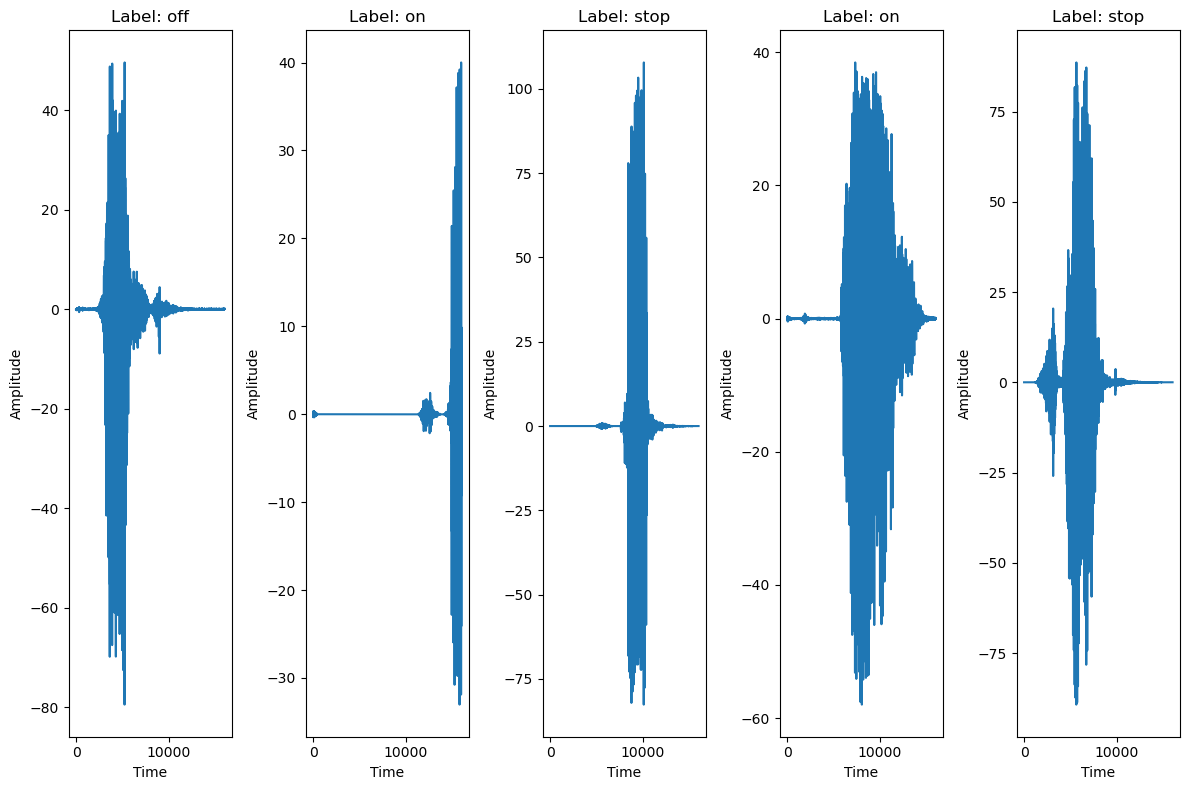

In [86]:
plot_waveform(train_ds, ds_info, num_samples=5)

In [80]:
def inspect_dataset(dataset, num_samples=5):
    for audio, label in dataset.take(num_samples):
        print(f'Audio shape: {audio.shape}, Label: {label}')
        if isinstance(label, tf.Tensor):
            print(f'Label Tensor shape: {label.shape}, dtype: {label.dtype}')
        else:
            print(f'Label type: {type(label)}')

#_Inspect_the_dataset
inspect_dataset(train_ds)


Audio shape: (32, 16000), Label: [ 4  5  7  5  7  2 11  7  6  6 11  6  6 11 11 11 10 11 11 11 11 11 11  5
 11  1  7 11 11 11 11  9]
Label Tensor shape: (32,), dtype: <dtype: 'int64'>
Audio shape: (32, 16000), Label: [11 11 11  9  8  3 11 11 11 11 11 11  4 11 11  3 11 11  1 11 11 11 11 10
 11  1 11  3 11 11  6 11]
Label Tensor shape: (32,), dtype: <dtype: 'int64'>
Audio shape: (32, 16000), Label: [11  6 11 11 11 11  7 11  2 11 11  0 11  4  5 11  5  9 11  7 11 11 11 11
 11  2 11  4 11 11 11 11]
Label Tensor shape: (32,), dtype: <dtype: 'int64'>
Audio shape: (32, 16000), Label: [11  0 11 11 11 11  3  5 11  0 11 11  2 11  5 11  8 11 11 11  7 11 11 11
 11 11 11 11 11 11 11 11]
Label Tensor shape: (32,), dtype: <dtype: 'int64'>
Audio shape: (32, 16000), Label: [ 8 11 11 11 11 11  3  7  4  5 11 10 11 11  6  5 11 11  1  1  4  7  4  8
  2 11 11 11 11  0 11 11]
Label Tensor shape: (32,), dtype: <dtype: 'int64'>


In [68]:
print(type(ds))


<class 'list'>


#Statistical_Analysis

In [25]:
import tensorflow as tf
import numpy as np
import pandas as pd
import soundfile as sf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [89]:
def analyze_data_distribution(dataset):
    labels=[]
    for _, label in dataset:
        labels.extend(label.numpy())
    labels=np.array(labels)
    
    unique, counts=np.unique(labels, return_counts=True)
    label_counts=dict(zip(unique, counts))
    
    #print_distribution
    print("Label Distribution:")
    for label, count in label_counts.items():
        print(f"Label:{label}, Count:{count}")
        
    #plot_distribution
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()))
    plt.title('Label Distribution')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.show()

Number of Classes:12
Class Names:
['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes', '_silence_', '_unknown_']
Label Distribution:
Label:0, Count:3134
Label:1, Count:3106
Label:2, Count:3037
Label:3, Count:3130
Label:4, Count:2970
Label:5, Count:3086
Label:6, Count:3019
Label:7, Count:3111
Label:8, Count:2948
Label:9, Count:3228
Label:10, Count:668
Label:11, Count:54074


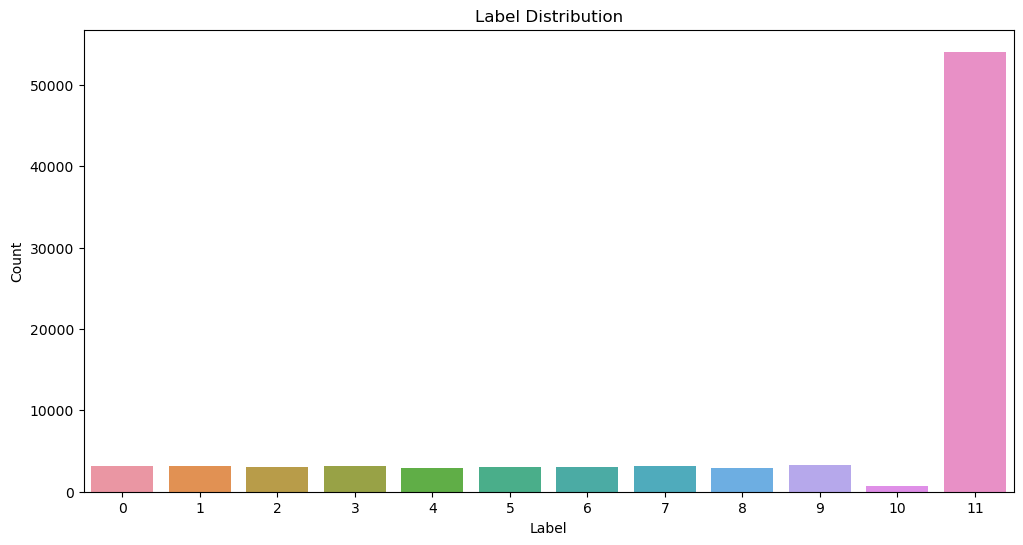

Label Distribution:
Label:0, Count:377
Label:1, Count:372
Label:2, Count:352
Label:3, Count:406
Label:4, Count:373
Label:5, Count:363
Label:6, Count:363
Label:7, Count:350
Label:8, Count:350
Label:9, Count:397
Label:10, Count:121
Label:11, Count:6278


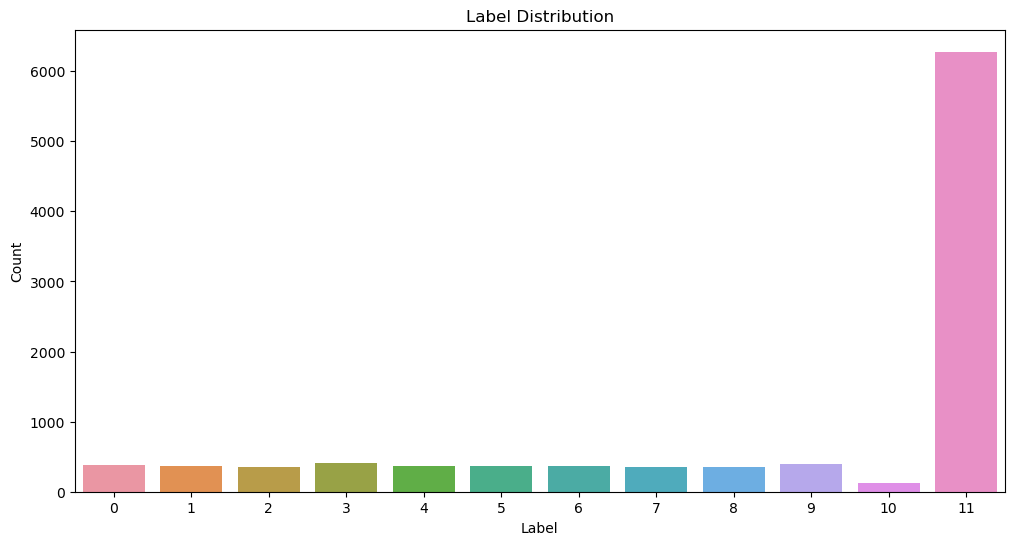

Label Distribution:
Label:0, Count:406
Label:1, Count:402
Label:2, Count:412
Label:3, Count:405
Label:4, Count:402
Label:5, Count:396
Label:6, Count:396
Label:7, Count:411
Label:8, Count:425
Label:9, Count:419
Label:10, Count:408
Label:11, Count:408


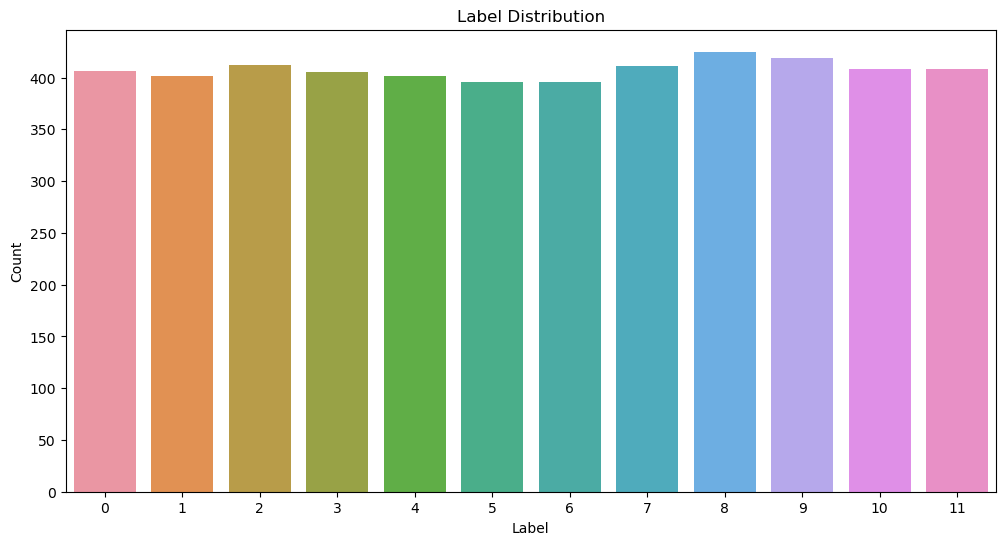

In [90]:
analyse_dataset_info(ds_info)
analyze_data_distribution(train_ds)
analyze_data_distribution(val_ds)
analyze_data_distribution(test_ds)

# Feature_Extraction(MFCC)

In [91]:
def extract_mfcc(audio, label):
    spectrogram=tf.signal.stft(audio, frame_length=256, frame_step=128)
    spectrogram=tf.abs(spectrogram)
    mfcc=tf.signal.mfccs_from_log_mel_spectrograms(spectrogram[..., :13])
    return mfcc, label
train_ds = train_ds.map(extract_mfcc)
test_ds = test_ds.map(extract_mfcc)
val_ds = val_ds.map(extract_mfcc)


In [92]:
train_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, None, 13), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [106]:
def preprocess(audio, label):
    audio = tf.cast(audio, tf.float32) / 255.0 
    desired_length = 16000  
    audio = tf.cond(tf.shape(audio)[0] < desired_length, 
                    lambda: tf.pad(audio, [[0, desired_length - tf.shape(audio)[0]]]), 
                    lambda: audio[:desired_length]) 
    audio = tf.expand_dims(audio, axis=-1)
    return audio, label


# Model(Classifier)_Training

In [107]:
#Define_the_model

import tensorflow as tf
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Input(shape=(16000,)),
    layers.Reshape((16000, 1)),  #Reshape_to_fit_Conv1D_input
    layers.Conv1D(32, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Conv1D(128, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(ds_info.features['label'].names), activation='softmax')  #Output_layer_for_classification
])

In [108]:
model = tf.keras.Sequential([
    layers.Input(shape=(16000, 1)),  # Mono audio input
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')  # Output layer for classification
])


In [111]:
layers.Flatten()


In [114]:
model = tf.keras.Sequential([
    layers.Input(shape=(16000, 13)), 
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')  
])


#Compile_the_model

In [115]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Train_the_model

In [102]:
audio, label = preprocess(audio, label)
print(audio.shape)


(16000,)


In [127]:
train_audio, train_labels = zip(*train_ds)  
val_audio, val_labels = zip(*val_ds)  

In [121]:
print(train_labels.shape)
print(val_labels.shape)


(10,)
(10,)


In [129]:
print(type(train_labels), len(train_labels))
print(train_labels[:5])  # Inspect first 5 labels to understand their structure

<class 'tuple'> 2673
(<tf.Tensor: shape=(32,), dtype=int64, numpy=
array([ 4,  5,  7,  5,  7,  2, 11,  7,  6,  6, 11,  6,  6, 11, 11, 11, 10,
       11, 11, 11, 11, 11, 11,  5, 11,  1,  7, 11, 11, 11, 11,  9])>, <tf.Tensor: shape=(32,), dtype=int64, numpy=
array([11, 11, 11,  9,  8,  3, 11, 11, 11, 11, 11, 11,  4, 11, 11,  3, 11,
       11,  1, 11, 11, 11, 11, 10, 11,  1, 11,  3, 11, 11,  6, 11])>, <tf.Tensor: shape=(32,), dtype=int64, numpy=
array([11,  6, 11, 11, 11, 11,  7, 11,  2, 11, 11,  0, 11,  4,  5, 11,  5,
        9, 11,  7, 11, 11, 11, 11, 11,  2, 11,  4, 11, 11, 11, 11])>, <tf.Tensor: shape=(32,), dtype=int64, numpy=
array([11,  0, 11, 11, 11, 11,  3,  5, 11,  0, 11, 11,  2, 11,  5, 11,  8,
       11, 11, 11,  7, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11])>, <tf.Tensor: shape=(32,), dtype=int64, numpy=
array([ 8, 11, 11, 11, 11, 11,  3,  7,  4,  5, 11, 10, 11, 11,  6,  5, 11,
       11,  1,  1,  4,  7,  4,  8,  2, 11, 11, 11, 11,  0, 11, 11])>)


In [131]:
# Determine the number of classes based on the max label value
num_classes = max(np.max(train_labels_concat), np.max(val_labels_concat)) + 1

# Convert to one-hot encoding
train_labels_one_hot = tf.keras.utils.to_categorical(train_labels_concat, num_classes=num_classes)
val_labels_one_hot = tf.keras.utils.to_categorical(val_labels_concat, num_classes=num_classes)

print(train_labels_one_hot.shape)  # Should be (number_of_samples, num_classes)
print(val_labels_one_hot.shape)    # Should be (number_of_samples, num_classes)


(85511, 12)
(10102, 12)


In [135]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define_the_shape_of_input_data
input_shape = (32, 124, 13) 
num_classes = 12  

#Define_the_model
model = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Adjust num_classes as needed
])

#Compile_the_model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Print_model_summary
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 122, 32)       3776      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 61, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 59, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 29, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 27, 64)         36928     
                                                                 
 flatten_9 (Flatten)         (None, 6912)             

In [134]:
for features, labels in train_ds.take(1):  # Take one batch
    print("Features shape:", features.shape)
    break

Features shape: (32, 124, 13)


In [138]:
print("Shape of train_ds:", np.shape(train_ds))
print("Shape of train_labels_one_hot:", np.shape(train_labels_one_hot))


Shape of train_ds: ()
Shape of train_labels_one_hot: (85511, 12)


In [139]:
print("Type of train_ds:", type(train_ds))
print("Type of train_labels_one_hot:", type(train_labels_one_hot))


Type of train_ds: <class 'tensorflow.python.data.ops.map_op._MapDataset'>
Type of train_labels_one_hot: <class 'numpy.ndarray'>


In [142]:
train_ds = train_ds.shuffle(buffer_size=1000).batch(32)
val_ds = val_ds.batch(32)

In [1]:
import tensorflow as tf
import numpy as np

train_features = np.random.rand(85511, 64, 64, 3)  
train_labels = np.random.randint(0, 12, size=(85511,)) 


train_labels_one_hot = tf.keras.utils.to_categorical(train_labels, num_classes=12)


train_ds = tf.data.Dataset.from_tensor_slices((train_features, train_labels_one_hot))

val_features = np.random.rand(10000, 64, 64, 3)  
val_labels = np.random.randint(0, 12, size=(10000,))
val_labels_one_hot = tf.keras.utils.to_categorical(val_labels, num_classes=12)
val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels_one_hot))


train_ds = train_ds.shuffle(buffer_size=1000).batch(32)
val_ds = val_ds.batch(32)

#Define_the_model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(64, 64, 3)),  
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(12, activation='softmax')  
])

#Compile_the_model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Train_the_model
history = model.fit(train_ds, 
                    validation_data=val_ds, 
                    epochs=10)


Epoch 1/10
2673/2673 [==============================] - 74s 27ms/step - loss: 2.4852 - accuracy: 0.0833 - val_loss: 2.4849 - val_accuracy: 0.0877
Epoch 2/10
2673/2673 [==============================] - 82s 31ms/step - loss: 2.4851 - accuracy: 0.0840 - val_loss: 2.4849 - val_accuracy: 0.0877
Epoch 3/10
2673/2673 [==============================] - 79s 30ms/step - loss: 2.4851 - accuracy: 0.0840 - val_loss: 2.4849 - val_accuracy: 0.0877
Epoch 4/10
2673/2673 [==============================] - 74s 28ms/step - loss: 2.4851 - accuracy: 0.0840 - val_loss: 2.4849 - val_accuracy: 0.0877
Epoch 5/10
2673/2673 [==============================] - 77s 29ms/step - loss: 2.4851 - accuracy: 0.0838 - val_loss: 2.4849 - val_accuracy: 0.0877
Epoch 6/10
2673/2673 [==============================] - 79s 29ms/step - loss: 2.4851 - accuracy: 0.0838 - val_loss: 2.4849 - val_accuracy: 0.0877
Epoch 7/10
2673/2673 [==============================] - 71s 27ms/step - loss: 2.4851 - accuracy: 0.0840 - val_loss: 2.4849 -